## Skup belog vina
### Prosto povezana neuronska mreza

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing import sequence

In [2]:
seed_value = 7

import os
os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import random
random.seed(seed_value)

np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
data=pd.read_csv('winequality-white.csv',delimiter=';')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
x=data.drop(labels='quality',axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [6]:
y=data['quality']
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

Podela podataka

In [7]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.8, stratify =y , random_state =7 )

In [8]:
x_train.shape

(3918, 11)

In [9]:
x_test.shape

(980, 11)

In [10]:
y_train.shape

(3918,)

In [11]:
y_test.shape

(980,)

Standardizacija

In [12]:
scaler=StandardScaler()

In [13]:
scaler.fit(x_train)

StandardScaler()

In [14]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Ulaz i izlaz neuronske mreze

In [15]:
number_of_features = x.shape[1]
output_size = 10

Model

In [16]:
model = Sequential([
    Input(shape=(number_of_features,)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=output_size, activation='softmax')])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3178 (12.41 KB)
Trainable params: 3178 (12.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model treniranje

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [19]:
#50 epoha
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50

196/196 [==============================] - 1s 3ms/step - loss: 34.0629 - accuracy: 0.1072 - val_loss: 34.5952 - val_accuracy: 0.0944
Epoch 2/50
196/196 [==============================] - 0s 2ms/step - loss: 34.0627 - accuracy: 0.0743 - val_loss: 34.5952 - val_accuracy: 0.0918
Epoch 3/50
196/196 [==============================] - 0s 2ms/step - loss: 34.0627 - accuracy: 0.0791 - val_loss: 34.5952 - val_accuracy: 0.0753
Epoch 4/50
196/196 [==============================] - 0s 2ms/step - loss: 34.0627 - accuracy: 0.0756 - val_loss: 34.5952 - val_accuracy: 0.0485
Epoch 5/50
196/196 [==============================] - 0s 2ms/step - loss: 34.0627 - accuracy: 0.0638 - val_loss: 34.5952 - val_accuracy: 0.0663
Epoch 6/50
196/196 [==============================] - 1s 3ms/step - loss: 34.0627 - accuracy: 0.0549 - val_loss: 34.5952 - val_accuracy: 0.0383
Epoch 7/50
196/196 [==============================] - 0s 2ms/step - loss: 34.0627 - accuracy: 0.0788 - val_loss: 34.5952 - val_accuracy

In [20]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']

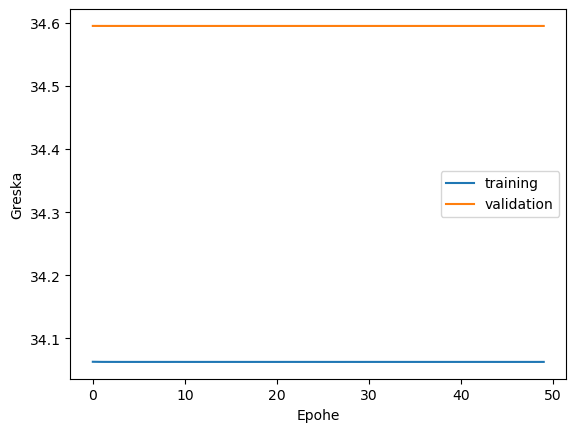

In [21]:
# Promena greske
plt.plot(epochs, loss, label='training')
plt.plot(epochs, validation_loss, label='validation')
plt.xlabel('Epohe')
plt.ylabel('Greska')
plt.legend(loc='best')
plt.savefig('promena_greske.png')
plt.show()

In [22]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

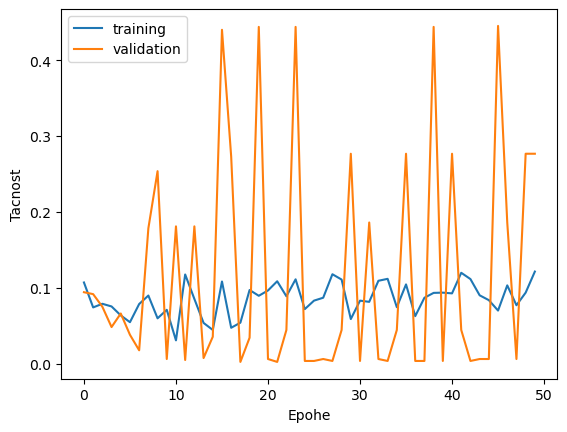

In [23]:
# Promena tacnosti
plt.plot(epochs, acc, label='training')
plt.plot(epochs, validation_acc, label='validation')
plt.xlabel('Epohe')
plt.ylabel('Tacnost')
plt.legend(loc='best')
plt.savefig('promena_tacnosti.png')
plt.show()

In [24]:
train_scores = model.evaluate(x_train, y_train, batch_size=16)

245/245 [==============================] - 0s 1ms/step - loss: 34.1692 - accuracy: 0.2961


In [25]:
test_scores = model.evaluate(x_test, y_test, batch_size=16)

62/62 [==============================] - 0s 2ms/step - loss: 34.1651 - accuracy: 0.2908


In [26]:
model.save('wine_quality_model3.hdf5') #cuvanje modela

In [27]:
#ponovni poziv modela
#loaded_model = load_model('wine_quality_model.hdf5')